In [10]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply

In [11]:
# Importing the data set
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [12]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [13]:
df_1 = df.iloc[:,1:2].values

In [14]:
df_1

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [15]:
#splitting dataset into train and test split
training_size = int(len(df_1)*0.65)
test_size = len(df_1)-training_size
train_data,test_data = df_1[0:training_size],df_1[training_size:len(df_1)]

In [16]:
training_size,test_size

(1322, 713)

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_data)

In [18]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, training_size):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
40/40 [==============================] - 12s 109ms/step - loss: 0.0180
Epoch 2/100
40/40 [==============================] - 4s 106ms/step - loss: 0.0036
Epoch 3/100
40/40 [==============================] - 4s 108ms/step - loss: 0.0045
Epoch 4/100
40/40 [==============================] - 4s 108ms/step - loss: 0.0035
Epoch 5/100
40/40 [==============================] - 4s 104ms/step - loss: 0.0033
Epoch 6/100
40/40 [==============================] - 4s 103ms/step - loss: 0.0030 1s - 
Epoch 7/100
40/40 [==============================] - 4s 106ms/step - loss: 0.0033
Epoch 8/100
40/40 [==============================] - 4s 104ms/step - loss: 0.0032
Epoch 9/100
40/40 [==============================] - 4s 107ms/step - loss: 0.0029
Epoch 10/100
40/40 [==============================] - 4s 107ms/step - loss: 0.0027
Epoch 11/100
40/40 [==============================] - 4s 109ms/step - loss: 0.0032
Epoch 12/100
40/40 [==============================] - 5s 135ms/step - loss: 0.0026
Epoch 

40/40 [==============================] - 4s 108ms/step - loss: 8.0807e-04
Epoch 100/100
40/40 [==============================] - 4s 111ms/step - loss: 0.0010


In [28]:
# Getting the predicted stock price
dataset_total = np.concatenate((train_data, test_data))
dataset_total = pd.DataFrame(dataset_total)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [29]:
X_test = []
for i in range(60, test_size):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

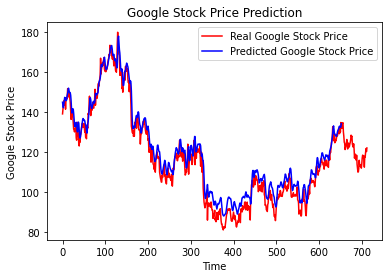

In [31]:
# Visualising the results
ply.plot(test_data, color = 'red', label = 'Real Google Stock Price')
ply.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
ply.title('Google Stock Price Prediction')
ply.xlabel('Time')
ply.ylabel('Google Stock Price')
ply.legend()
ply.show()